In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
data_set = pd.read_csv("Data_source.csv", sep=";")
data_set.columns = ['Id','ethnicgp', 'gender', 'age', 'years', 'commit', 
'satis', 'autonom', 'routine', 'attend', 'skill', 'prody', 'qual', 'absence', 'income']
data_set.head()

,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,"16,6"
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,"14,6"
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,"17,8"
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,"16,4"
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,"18,6"


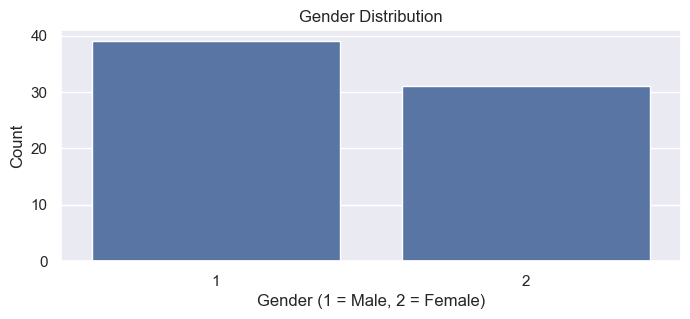

In [24]:
plt.figure(figsize=(8,3))
sns.countplot(x='gender', data= data_set)
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.show()

In [ ]:
ethnic_counts = data_set['ethnicgp'].value_counts()